In [1]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import spycone as spy
import subprocess
from gtfparse import read_gtf

/nfs/home/students/rahelcaspar/.conda/envs/spycone/lib/python3.7/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
print(sys.version)

3.7.16 (default, Jan 17 2023, 22:20:44) 
[GCC 11.2.0]


In [3]:
# Prepare the dataset

data = pd.read_csv("/nfs/proj/gr_splicing/star_rsem/rsem.merged.transcript_tpm.tsv", sep="\t")

#filter columns data_ts -> only the columns with wildtype
#use only columns (samples) from timepoints with 3 replicates
data_ts = data.drop(["transcript_id", "gene_id"], axis="columns")
samples_wt = pd.read_csv("MA/Samples_Tabellen/samples_wt-reduced.csv")
samples_wt = samples_wt["sample"].to_list()
data_ts = data_ts.filter(items=samples_wt)

geneid = data["gene_id"].to_list()
transcriptid = data["transcript_id"].to_list()

In [4]:
#give mapping to gene symbols
symbols = pd.read_csv("MA/Samples_Tabellen/geneids_symbols_converted.txt", sep="\t")

genesymbols = symbols["symbol"].to_list()


In [5]:
# read the data to the dataset function
dset = spy.dataset(ts=data_ts, transcript_id=transcriptid, gene_id = geneid, species=10090, keytype="ensemblgeneid", timepts=5, reps1=3, symbs = genesymbols)

In [6]:
# import biological network
#bionet = spy.BioNetwork(path="mouse", keytype="ensemblgeneid")


In [7]:
# Preprocessing

spy.preprocess(dset, cutoff=1)
#_ Filtering out genes that has expression across all time points lower than 1. (change cutoff?, default=0)
#__ By giving the biological network, it removes genes from the dataset that are not in the network.



Input data dimension: (3, 149547, 5)
Removed 125174 objects lower than 1
Filtered data: (3, 24373, 5)


In [8]:
# Detect isoform switch

iso = spy.iso_function(dset)

ascov=iso.detect_isoform_switch()
#_ combine({'median', 'mean'})-default="median"; 
#_ corr_cutoff (default = 0.7) – minimum correlation of isoform pairs to be included in the output. change?
#_ min_diff (default = 0.1) – minimum differences of relative abundance to be included in the output. change?
#_ adjustp (str {'fdr_bh' (default), 'holm_bonf', 'bonf'}) – Method for multiple testing 
#   bonf: Bonferroni method holm_bonf: holm-bonferroni method fdr_bh: Benjamin-hochberg false discovery rate

#_ (filtering ((boolean, default=True)) -> if True, low expression genes will be filtered out)
#_ (filter_cutoff (default=2) – expression mean cutoff to filter.)

1137 of genes with low expression are filtered out!!.
calculating for 11187 genes...
----Result statistics----
Total genes with IS genes: 266
Events found: 303
Events with affecting domains: 0.0
Mean event importance: 0.5367334006939865
Mean difference before and after switch: 0.17602009251151543
--------------------------
DONE


In [9]:
ascov.head()

,gene,gene_symb,major_transcript,minor_transcript,switch_prob,corr,diff,event_importance,exclusive_domains,p_value,adj_pval
0,ENSMUSG00000032295,Man2c1,ENSMUST00000162340,ENSMUST00000162634,1.0,0.638945,0.090048,0.405170,[],0.017663,0.017111
1,ENSMUSG00000028700,Pomgnt1,ENSMUST00000106498,ENSMUST00000127426,1.0,0.571782,0.385330,0.323241,[],0.002584,0.002562
2,ENSMUSG00000021076,Actr10,ENSMUST00000220582,ENSMUST00000220452,1.0,0.536418,0.097517,0.845610,[],0.013034,0.012726
3,ENSMUSG00000047721,Bola2,ENSMUST00000052145,ENSMUST00000144571,1.0,0.590825,0.222019,0.295390,[],0.017576,0.017029
4,ENSMUSG00000030304,Ergic2,ENSMUST00000032446,ENSMUST00000126698,1.0,0.641026,0.106835,0.827831,[],0.000229,0.000228


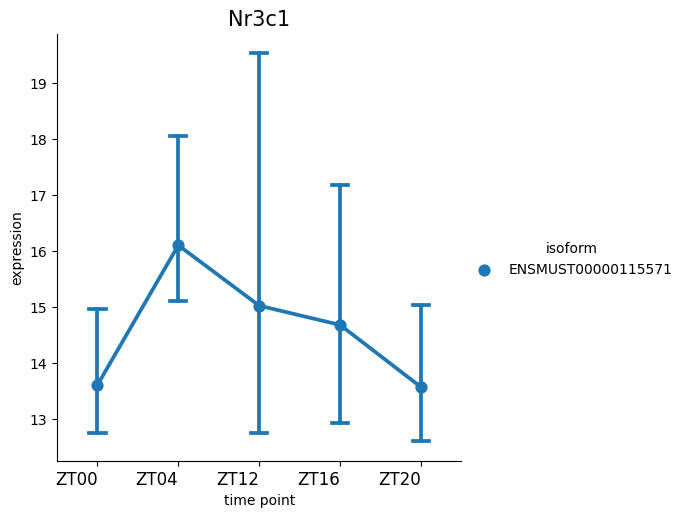

In [30]:
#switch plot of single gene: 
# GR gene: 
%matplotlib inline
spy.switch_plot("Nr3c1", dset, ascov, all_isoforms=True, xaxis_label = ["ZT00", "ZT04", "ZT12", "ZT16", "ZT20"])


In [31]:
# GR repressed genes

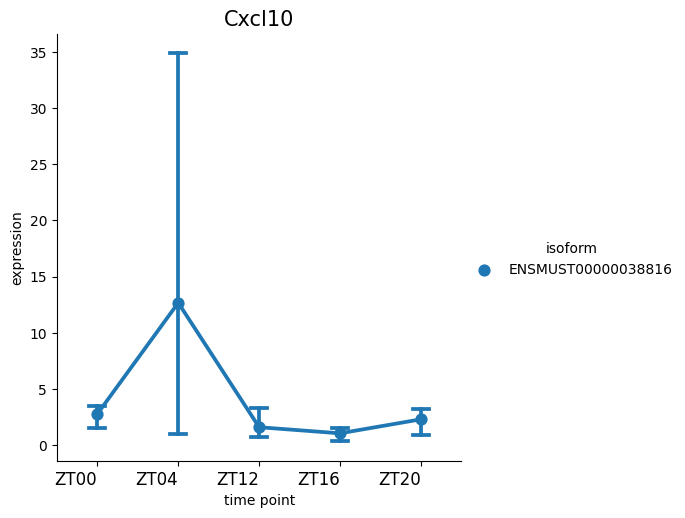

In [32]:
#switch plot of single gene: 
# GR repressed genes: 
%matplotlib inline
spy.switch_plot("Cxcl10", dset, ascov, all_isoforms=True, xaxis_label = ["ZT00", "ZT04", "ZT12", "ZT16", "ZT20"])


In [33]:
#switch plot of single gene: 
# GR repressed genes: 
%matplotlib inline
spy.switch_plot("Ccl7", dset, ascov, all_isoforms=True, xaxis_label = ["ZT00", "ZT04", "ZT12", "ZT16", "ZT20"])


IndexError: index 0 is out of bounds for axis 0 with size 0

In [34]:
#switch plot of single gene: 
# GR repressed genes: 
%matplotlib inline
spy.switch_plot("Ccl2", dset, ascov, all_isoforms=True, xaxis_label = ["ZT00", "ZT04", "ZT12", "ZT16", "ZT20"])


IndexError: index 0 is out of bounds for axis 0 with size 0

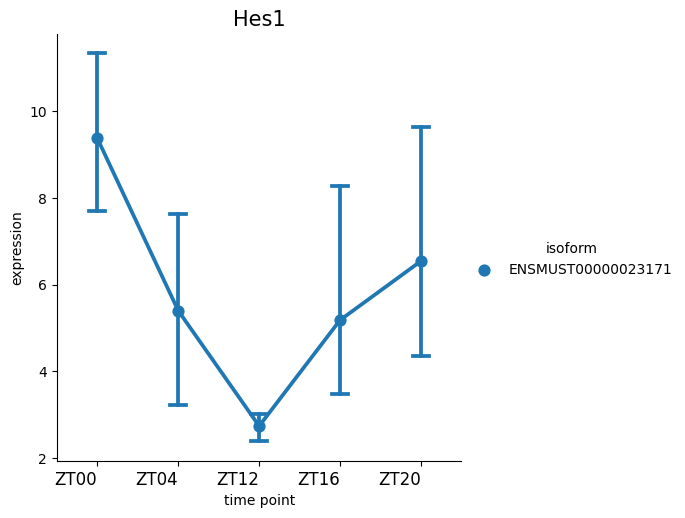

In [35]:
#switch plot of single gene: 
# GR repressed genes: 
%matplotlib inline
spy.switch_plot("Hes1", dset, ascov, all_isoforms=True, xaxis_label = ["ZT00", "ZT04", "ZT12", "ZT16", "ZT20"])


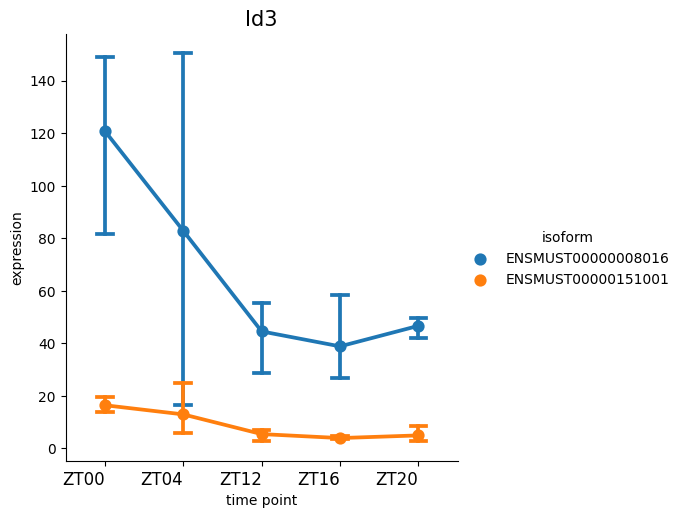

In [36]:
#switch plot of single gene: 
# GR repressed genes: 
%matplotlib inline
spy.switch_plot("Id3", dset, ascov, all_isoforms=True, xaxis_label = ["ZT00", "ZT04", "ZT12", "ZT16", "ZT20"])


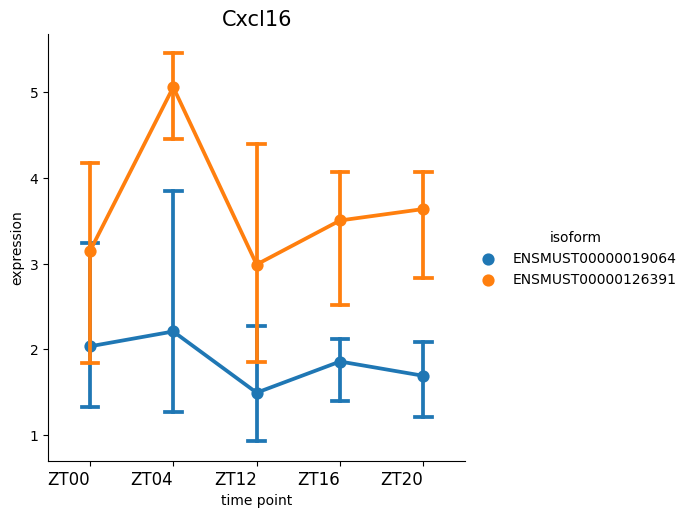

In [37]:
#switch plot of single gene: 
# GR repressed genes: 
%matplotlib inline
spy.switch_plot("Cxcl16", dset, ascov, all_isoforms=True, xaxis_label = ["ZT00", "ZT04", "ZT12", "ZT16", "ZT20"])


In [38]:
# GR activated genes

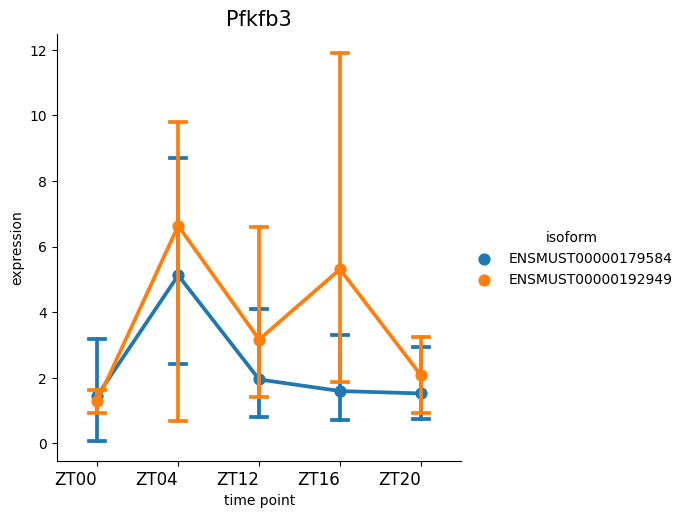

In [39]:
#switch plot of single gene: 
# GR activated genes: 
%matplotlib inline
spy.switch_plot("Pfkfb3", dset, ascov, all_isoforms=True, xaxis_label = ["ZT00", "ZT04", "ZT12", "ZT16", "ZT20"])


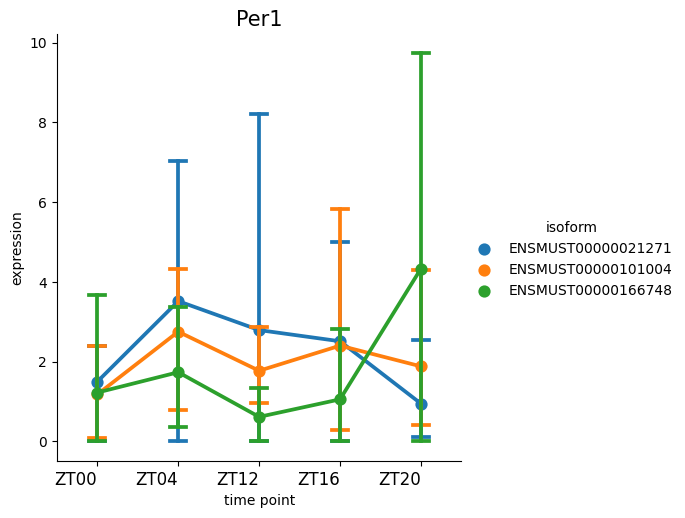

In [40]:
#switch plot of single gene: 
# GR activated genes: 
%matplotlib inline
spy.switch_plot("Per1", dset, ascov, all_isoforms=True, xaxis_label = ["ZT00", "ZT04", "ZT12", "ZT16", "ZT20"])


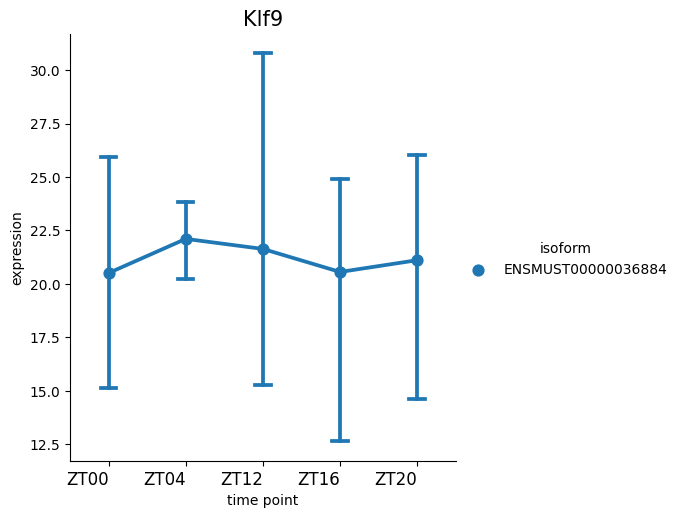

In [41]:
#switch plot of single gene: 
# GR activated genes: 
%matplotlib inline
spy.switch_plot("Klf9", dset, ascov, all_isoforms=True, xaxis_label = ["ZT00", "ZT04", "ZT12", "ZT16", "ZT20"])


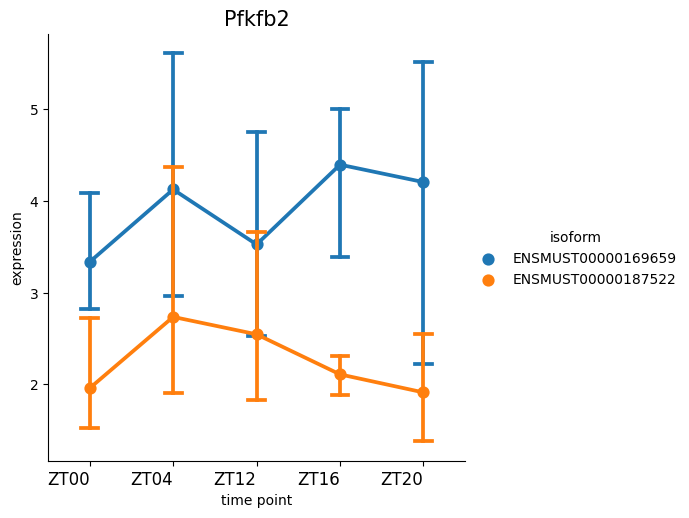

In [42]:
#switch plot of single gene: 
# GR activated genes: 
%matplotlib inline
spy.switch_plot("Pfkfb2", dset, ascov, all_isoforms=True, xaxis_label = ["ZT00", "ZT04", "ZT12", "ZT16", "ZT20"])


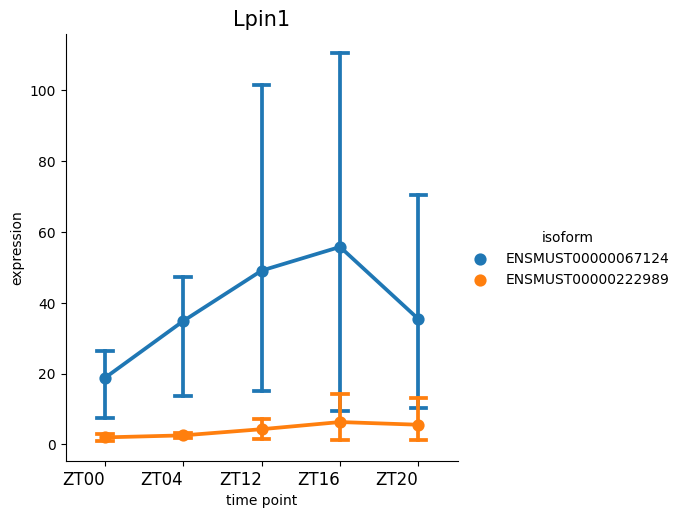

In [43]:
#switch plot of single gene: 
# GR activated genes: 
%matplotlib inline
spy.switch_plot("Lpin1", dset, ascov, all_isoforms=True, xaxis_label = ["ZT00", "ZT04", "ZT12", "ZT16", "ZT20"])


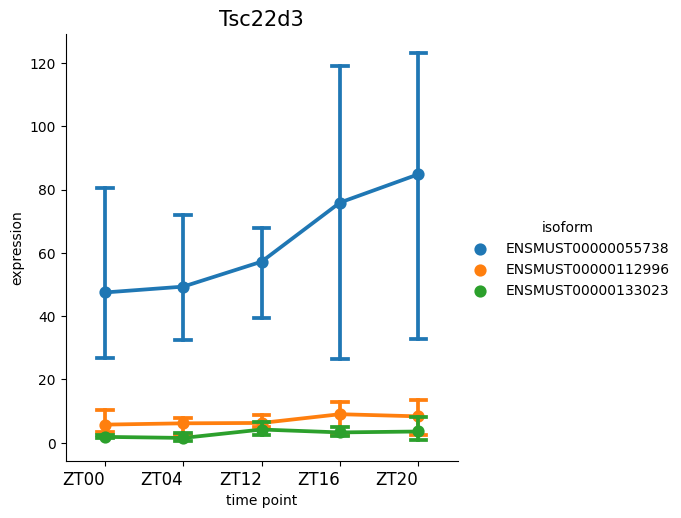

In [44]:
#switch plot of single gene: 
# GR activated genes: 
%matplotlib inline
spy.switch_plot("Tsc22d3", dset, ascov, all_isoforms=True, xaxis_label = ["ZT00", "ZT04", "ZT12", "ZT16", "ZT20"])


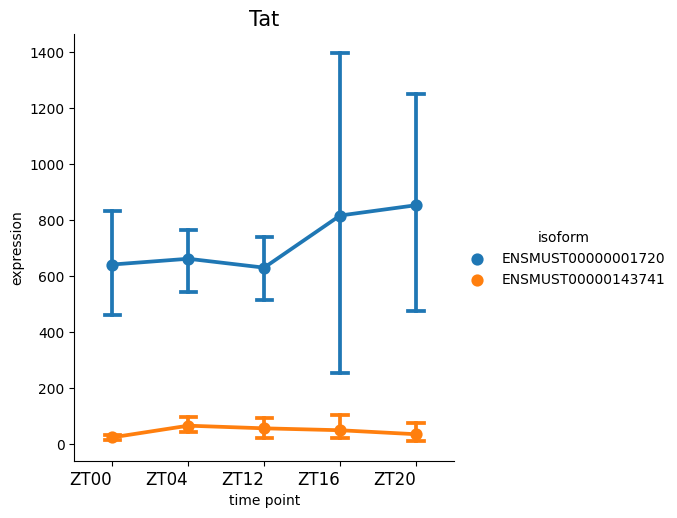

In [45]:
#switch plot of single gene: 
# GR activated genes: 
%matplotlib inline
spy.switch_plot("Tat", dset, ascov, all_isoforms=True, xaxis_label = ["ZT00", "ZT04", "ZT12", "ZT16", "ZT20"])


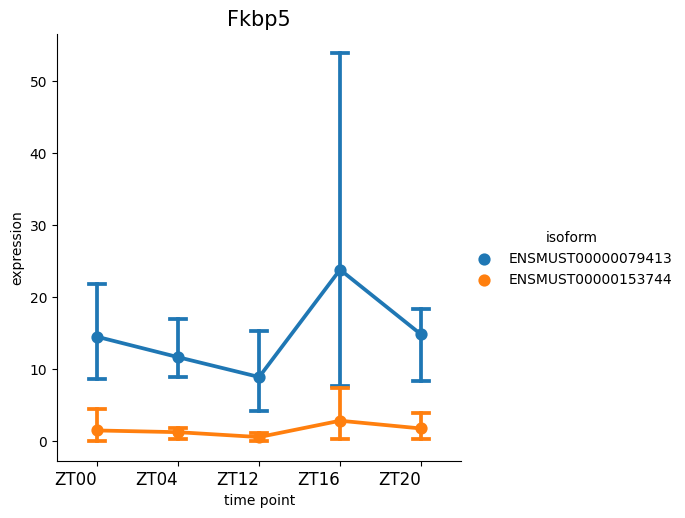

In [46]:
#switch plot of single gene: 
# GR activated genes: 
%matplotlib inline
spy.switch_plot("Fkbp5", dset, ascov, all_isoforms=True, xaxis_label = ["ZT00", "ZT04", "ZT12", "ZT16", "ZT20"])


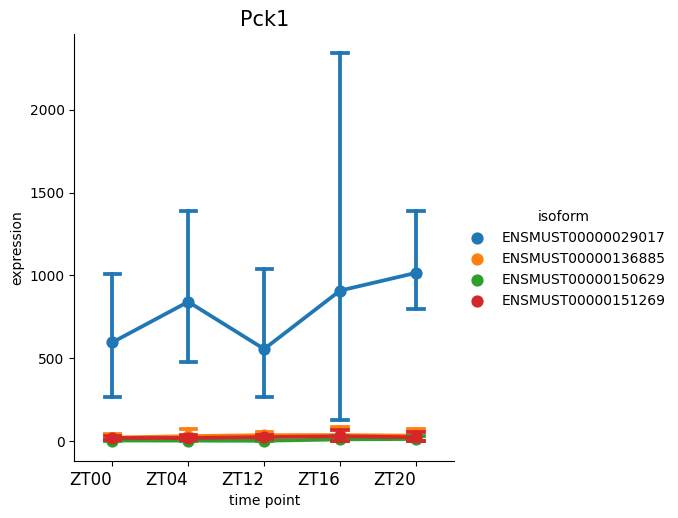

In [47]:
#switch plot of single gene: 
# GR activated genes: 
%matplotlib inline
spy.switch_plot("Pck1", dset, ascov, all_isoforms=True, xaxis_label = ["ZT00", "ZT04", "ZT12", "ZT16", "ZT20"])


In [48]:
# Clustering of total isoform usage

dset = iso.total_isoform_usage(ascov)

In [49]:
asclu = spy.clustering(dset, input_type="isoformusage", algorithm="hierarchical", linkage = "ward", n_clusters = 5)
c = asclu.find_clusters()

#_ algorithm ({'kmeans', 'kmedoids', 'dbscan', 'hierarchical', 'optics'}) – clustering algorithms from sklearn
#_ (composite (boolean, default=True) – if True, distance metrics is composited with inverse shortest path)
#_ metric ({'euclidean', 'correlation'}) – metrics from sklearn
#__ (linkage (only for 'hierarchical' clustering {default='average', 'complete', 'ward'}))
#__ (searchspace (default=20); n_clusters (default=10))

clustering took 0.019184112548828125s. 


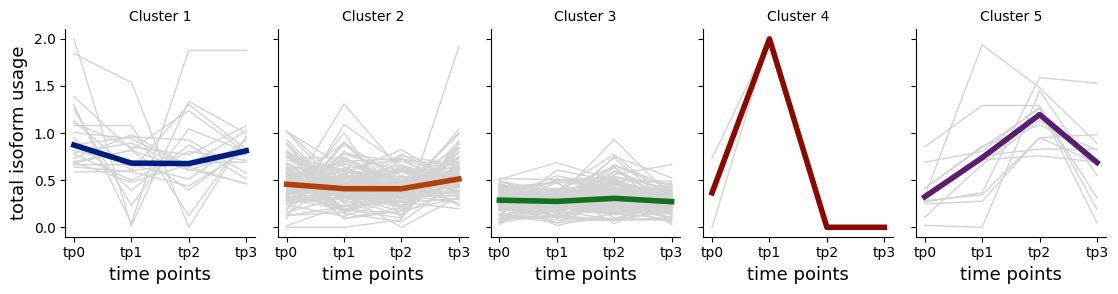

In [50]:
%matplotlib inline
spy.vis_all_clusters(asclu, y_label="total isoform usage")
# maybe change x_label, y_label, Titles ("Cluster {col_name}") 

#plt.savefig("wt_all_isoform_clusters.png")


In [51]:
# Gene Set Enrichment Analysis
asclu_go, _ = spy.clusters_gsea(dset, "mmusculus", is_results=ascov, method="gsea")


---------Gene Set Enrichment Result---------

Method: gsea 
Cluster 2  found enriched in 51 terms.
Cluster 1  found enriched in 1 terms.
Cluster 3  found enriched in 130 terms.
Cluster 4  found enriched in 0 terms.
Cluster 5  found enriched in 4 terms.
-----END-----


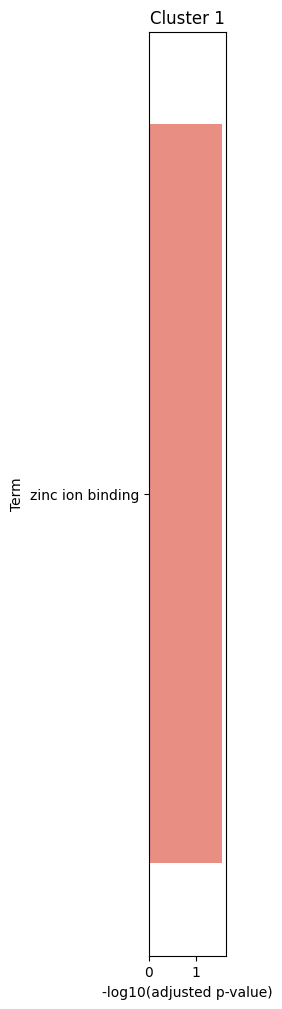

In [52]:
#visualize gsea cluster
%matplotlib inline
spy.gsea_plot(asclu_go, cluster=1, nterms = 20)


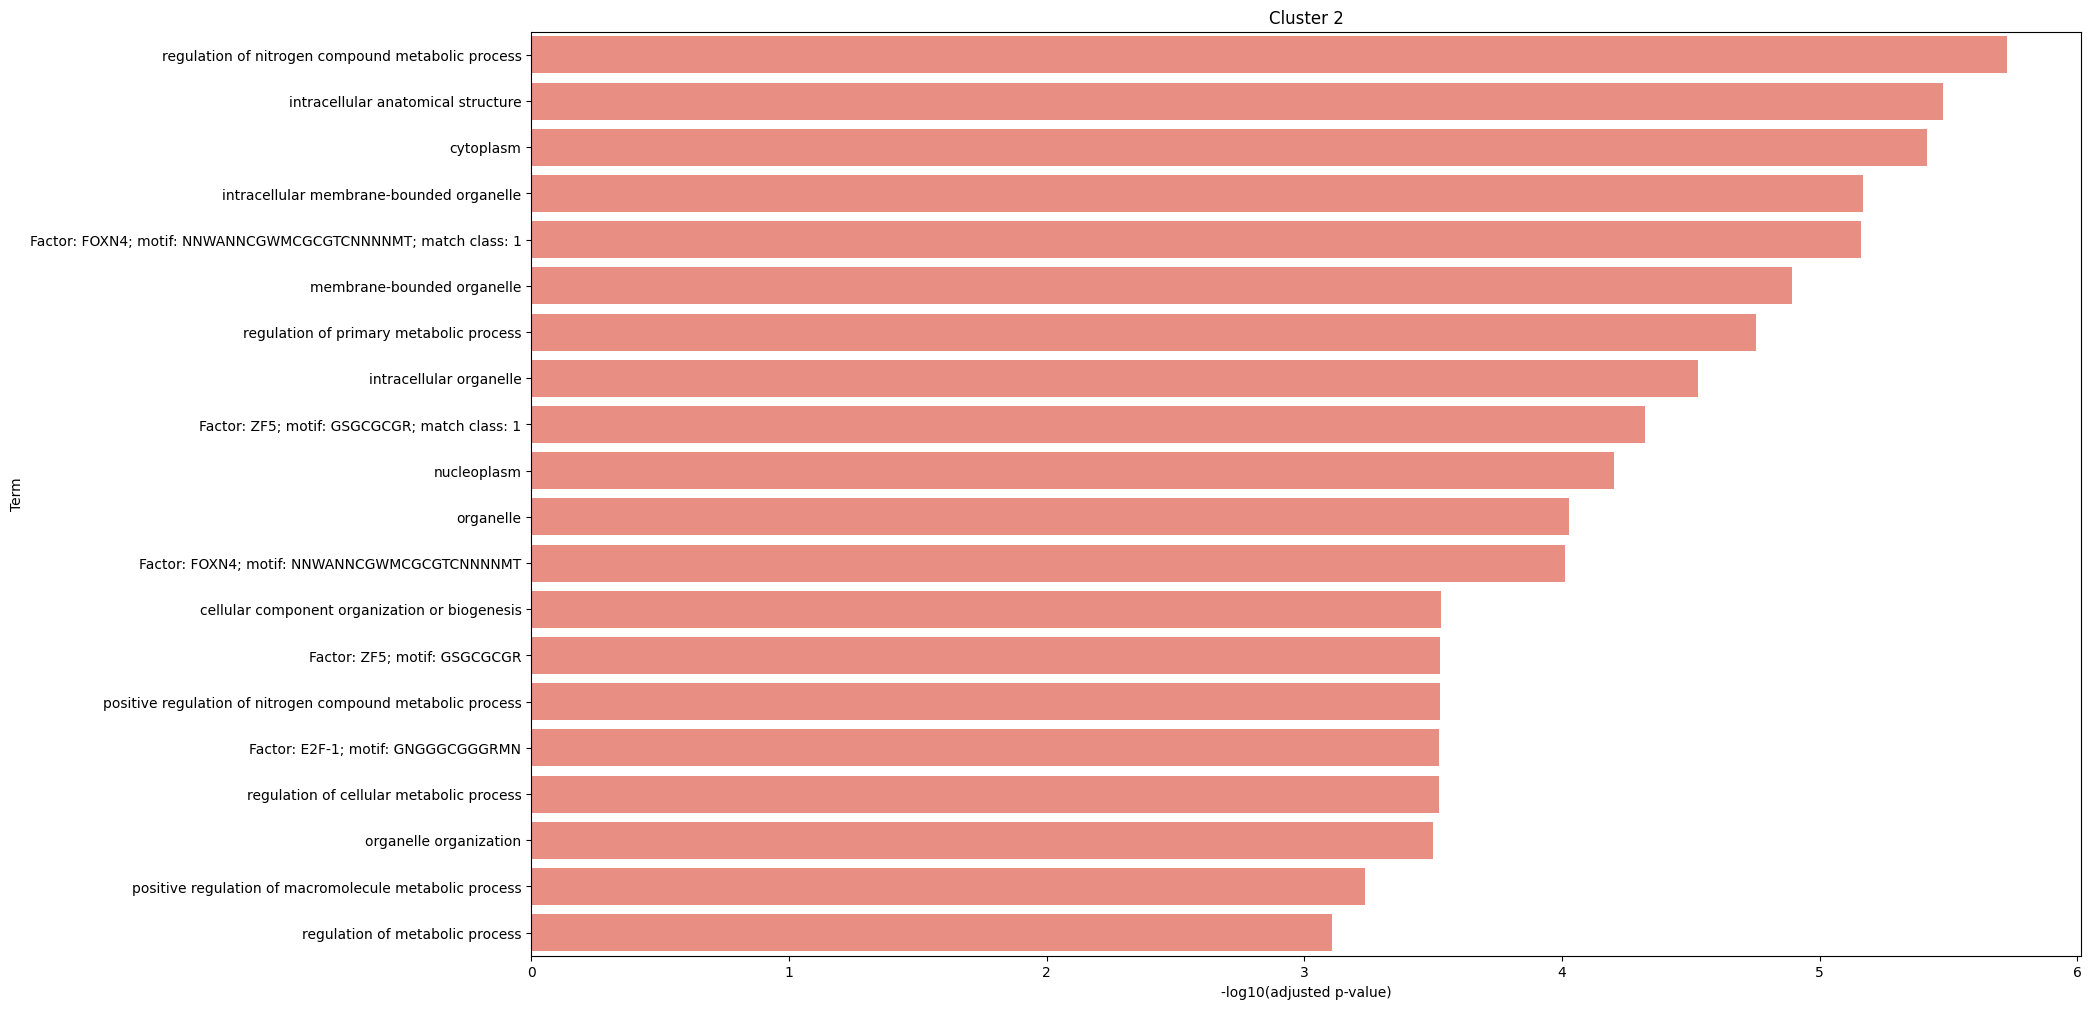

In [53]:
#visualize gsea cluster
%matplotlib inline
spy.gsea_plot(asclu_go, cluster=2, nterms = 20)


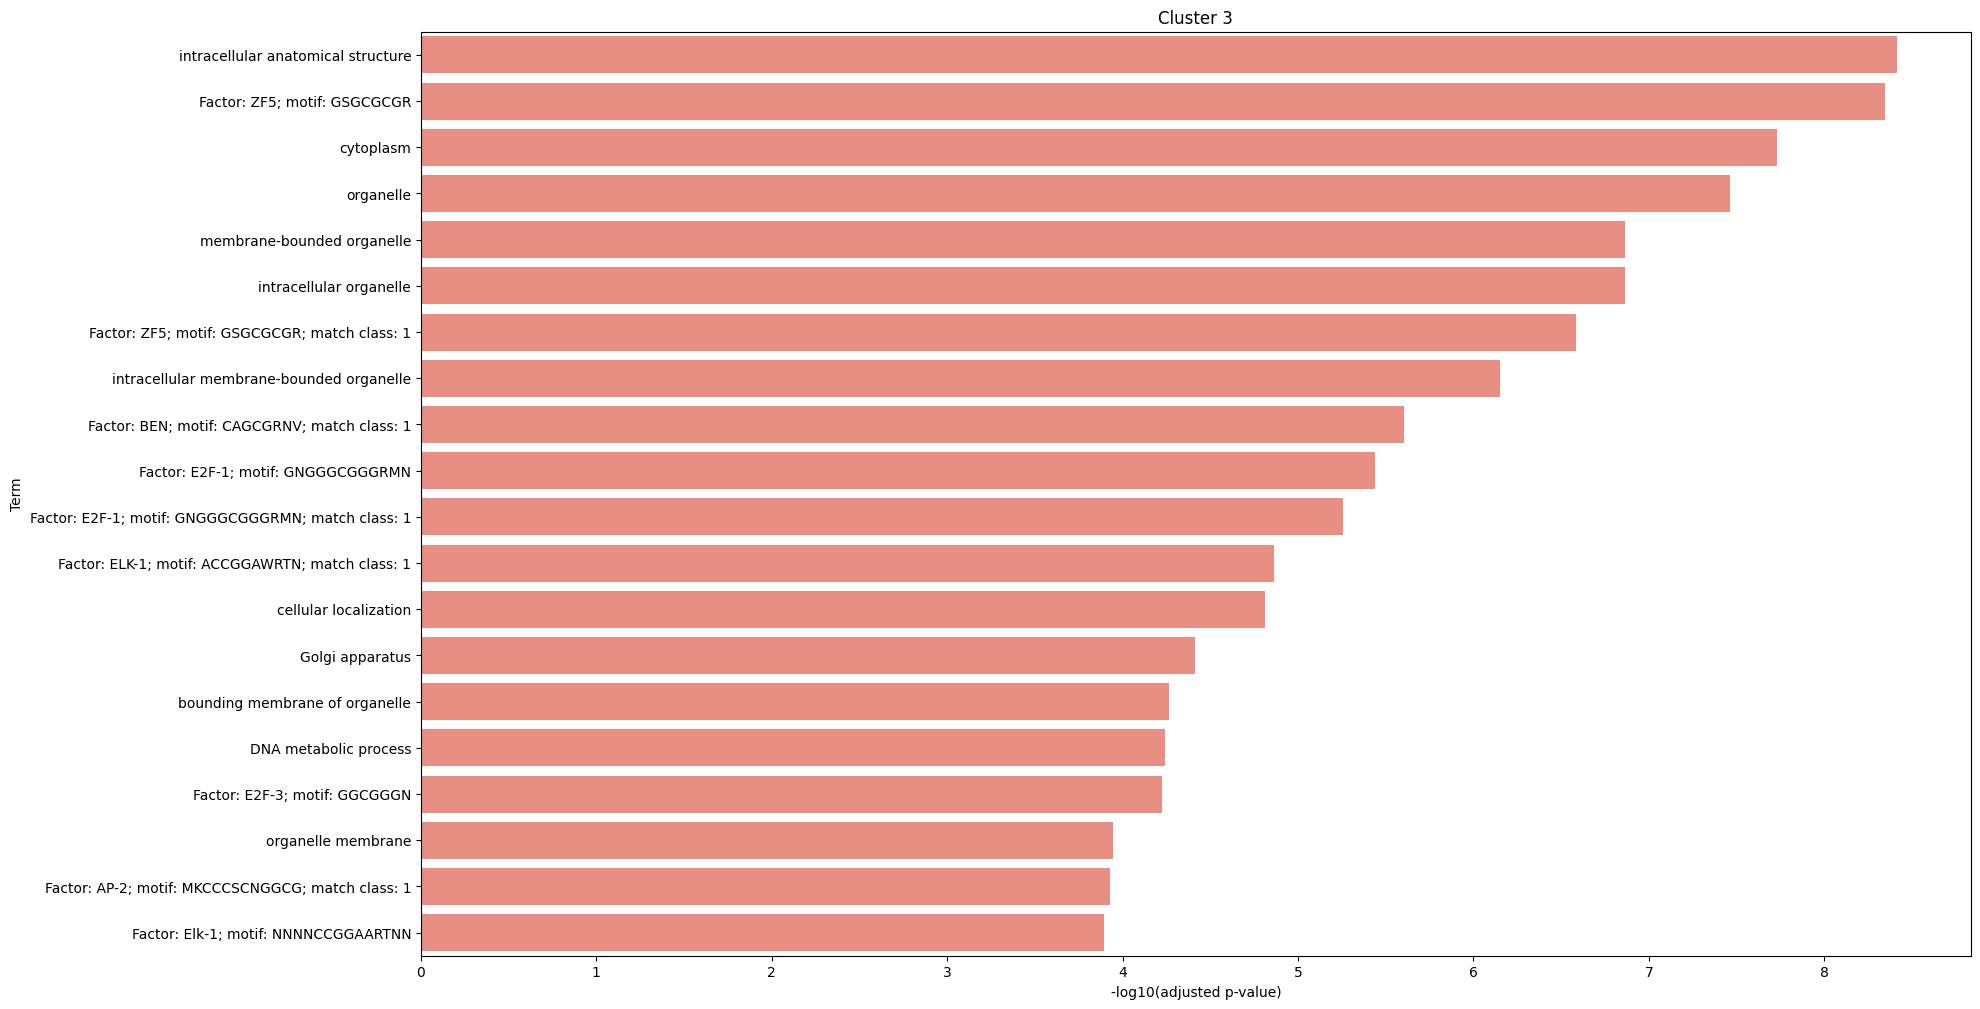

In [54]:
#visualize gsea cluster
%matplotlib inline
spy.gsea_plot(asclu_go, cluster=3, nterms = 20)


In [55]:
#visualize gsea cluster
%matplotlib inline
spy.gsea_plot(asclu_go, cluster=4, nterms = 20)


UnboundLocalError: local variable 'subset' referenced before assignment

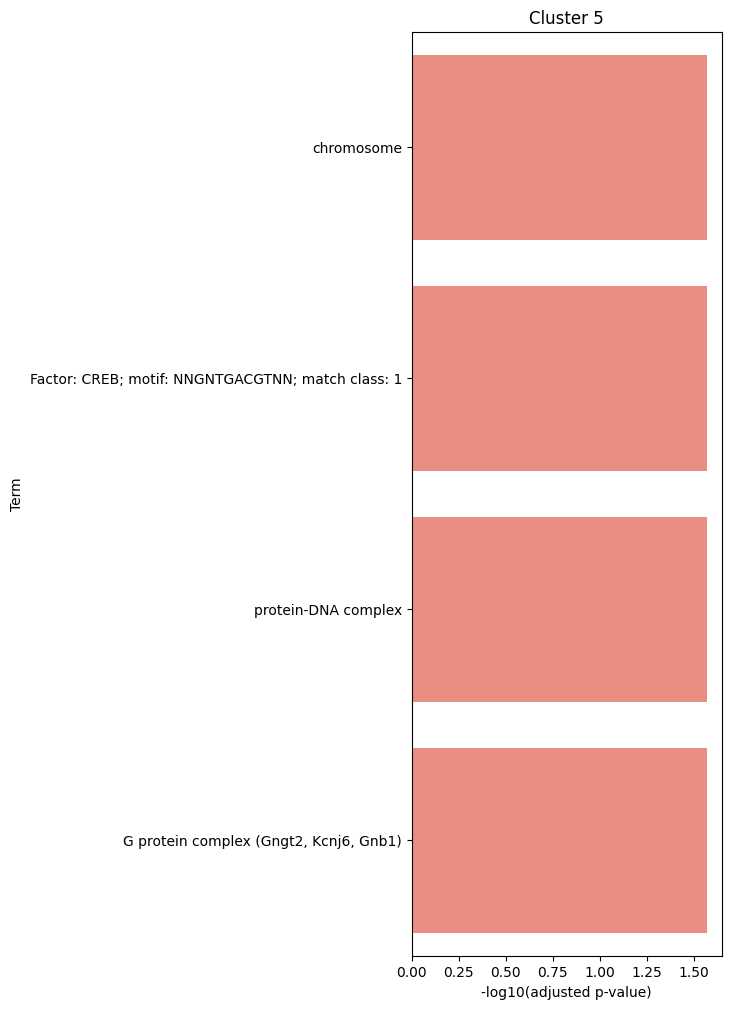

In [56]:
#visualize gsea cluster
%matplotlib inline
spy.gsea_plot(asclu_go, cluster=5, nterms = 20)


In [ ]:
# Splicing Factor Analysis


